Insight 1: "What is the correlation between Bitcoin and the S&P 500 during periods of economic crisis?"

Insight 2: "Does Bitcoin exhibits higher volatility compared to the S&P 500, especially in recent years?"

Insight 3: "The S&P 500 has more consistent returns, while Bitcoin shows extreme spikes, showing accumulated returns"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

In [3]:
# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

# Merge the datasets based on the Date column
merged_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on="Date")

# In this case it is NOT necessary to set 'Date' as the index, 
# it is more often use when doing resampling or slicing 

In [4]:
merged_data

,Date,BTC_Price,SP500_Price
0,2014-09-18,424.440002,2011.359985
1,2014-09-19,394.795990,2010.400024
2,2014-09-22,402.152008,1994.290039
3,2014-09-23,435.790985,1982.770020
4,2014-09-24,423.204987,1998.300049
...,...,...,...
2415,2024-04-24,64276.898438,5071.629883
2416,2024-04-25,64481.707031,5048.419922
2417,2024-04-26,63755.320313,5099.959961
2418,2024-04-29,63841.121094,5116.169922


Insight 1: "What is the correlation between Bitcoin and the S&P 500 during periods of economic crisis? (2020-03 to 2021-12)"

In [ ]:
# Correlation between Bitcoin and S&P 500 during Covid-19 (2020-03 to 2021-12)
start_date = '2020-03-01'
end_date = '2021-12-31'
covid_data = merged_data[(merged_data['Date'] >= start_date) & (merged_data['Date'] <= end_date)]

# Calculate correlation
correlation = covid_data[['BTC_Price', 'SP500_Price']].corr().iloc[0, 1] # this use the Pearson correlation 

print("The correlation between Bitcoin and S&P 500 during the COVID-19 crisis is: ", correlation) # The correlation between the BTC and SP500 was really high

The correlation between Bitcoin and S&P 500 during the COVID-19 crisis is:  0.8727460926387142


Graphic of that Covid-19 correlation

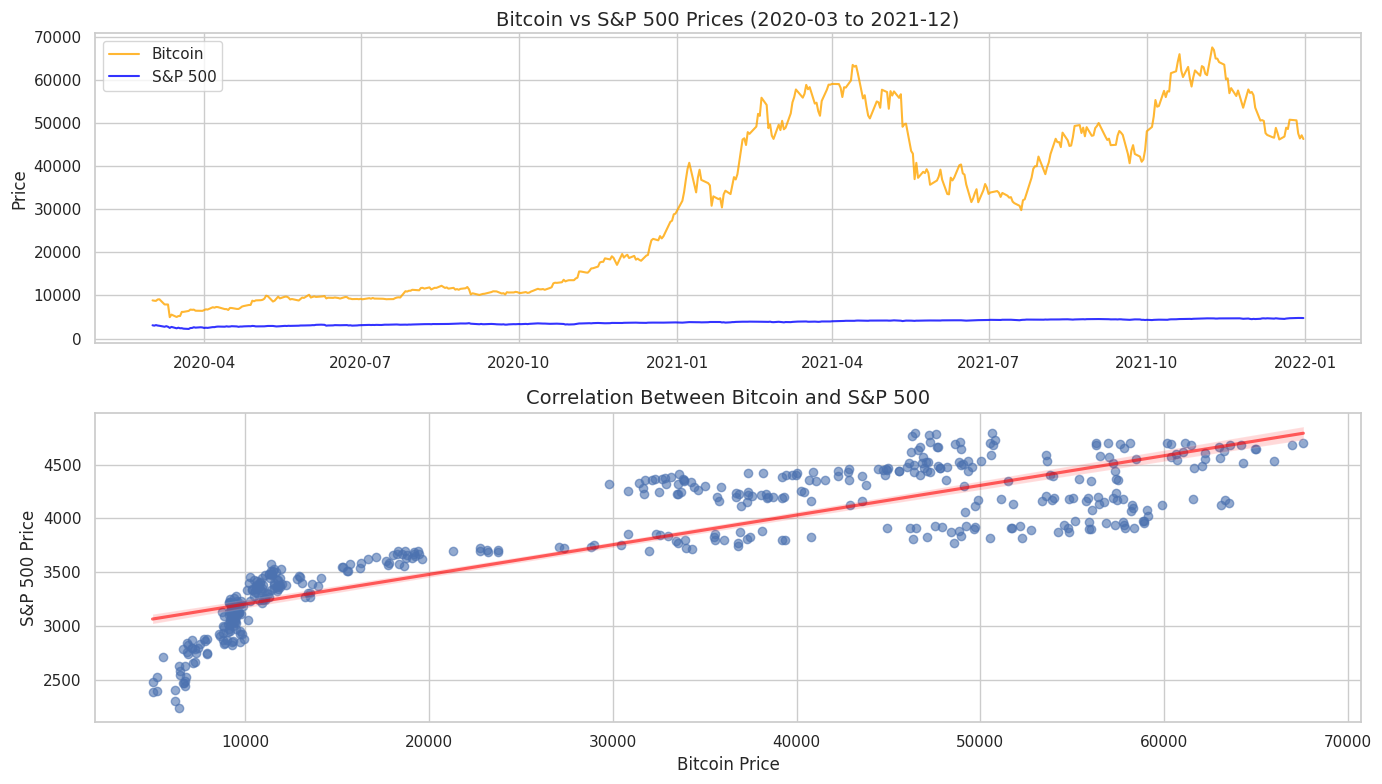

In [6]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14,8)) # Figure with multiple subplots

# Plot 1: Time series comparison
plt.subplot(2, 1, 1)
plt.plot(covid_data['Date'], covid_data['BTC_Price'], label='Bitcoin', color='orange', alpha=0.8)
plt.plot(covid_data['Date'], covid_data['SP500_Price'], label='S&P 500', color='blue', alpha=0.8)
plt.title('Bitcoin vs S&P 500 Prices (2020-03 to 2021-12)', fontsize=14)
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot 2: Scatter plot with correlation (linear regression)
plt.subplot(2, 1, 2)
sns.regplot(
  x= 'BTC_Price',
  y='SP500_Price',
  data=covid_data,
  scatter_kws = {'alpha': 0.6},
  line_kws={'color': 'red', 'alpha': 0.6}
)
plt.title('Correlation Between Bitcoin and S&P 500', fontsize=14)
plt.xlabel('Bitcoin Price')
plt.ylabel('S&P 500 Price')

# Adjust layout
plt.tight_layout()
plt.show()

Correlation with BTC and S&P 500 during Supply and energy Crisis 2021-2022 (Still covid issues and Ukraine-Russia War)

In [9]:
# Filter data for this crisis period (2021-2022)
start_date = '2021-01-01'
end_date = '2022-12-31'
supply_crisis_data = merged_data[(merged_data['Date'] >= start_date) & (merged_data['Date'] <= end_date)]
supply_crisis_data


,Date,BTC_Price,SP500_Price
1584,2021-01-04,31971.914063,3700.649902
1585,2021-01-05,33992.429688,3726.860107
1586,2021-01-06,36824.363281,3748.139893
1587,2021-01-07,39371.042969,3803.790039
1588,2021-01-08,40797.609375,3824.679932
...,...,...,...
2082,2022-12-23,16796.953125,3844.820068
2083,2022-12-27,16717.173828,3829.250000
2084,2022-12-28,16552.572266,3783.219971
2085,2022-12-29,16642.341797,3849.280029


In [ ]:
# Calculate Correlation
correlation = supply_crisis_data[['BTC_Price', 'SP500_Price']].corr().iloc[0, 1]
print("The correlation between Bitcoin and S&P 500 during the Supply and Energy crisis is: ", correlation) # The correlation between the BTC and SP500 was 0.60 which is still positive but moderated

The correlation between Bitcoin and S&P 500 during the Supply and Energy crisis is:  0.6017777187535696


Displaying grafics for this correlation

<Axes: xlabel='BTC_Price', ylabel='SP500_Price'>

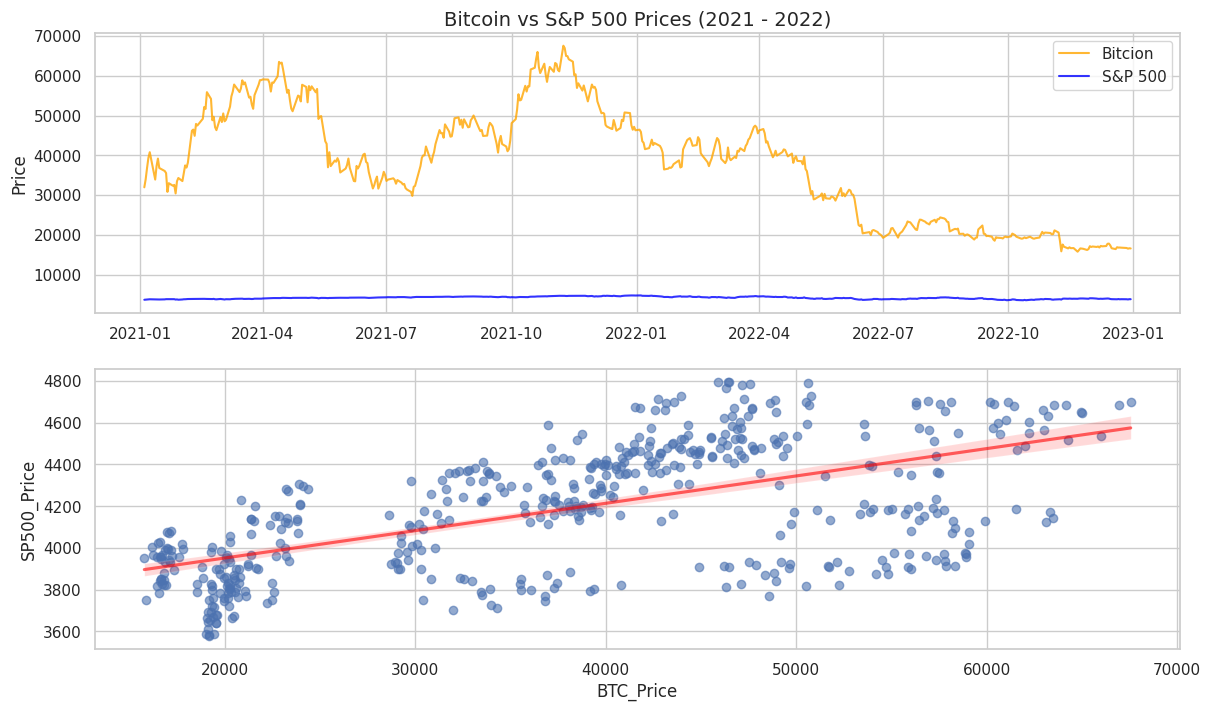

In [17]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14, 8))

# Time series graphic
plt.subplot(2, 1, 1)
plt.plot(supply_crisis_data['Date'], supply_crisis_data['BTC_Price'], label='Bitcion', color='orange', alpha=0.8)
plt.plot(supply_crisis_data['Date'], supply_crisis_data['SP500_Price'], label='S&P 500', color='blue', alpha=0.8)
plt.title('Bitcoin vs S&P 500 Prices (2021 - 2022)', fontsize=14)
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Scatter plot with regression line, graphic for the correlation 
plt.subplot(2, 1, 2)
sns.regplot(
  x='BTC_Price',
  y='SP500_Price',
  data=supply_crisis_data,
  scatter_kws={'alpha': 0.6},
  line_kws={'color': 'red', 'alpha': 0.6}
)